 REDES NEURONALES

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [3]:
# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

dog_images = []

for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200)) 
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar la imagen
    dog_images.append(img_array)

dog_images = np.array(dog_images)

dog_image_files = os.listdir(dog_subfolder)
print("Archivos en la subcarpeta 'dog':")
for file in dog_image_files:
            print(file)


Archivos en la subcarpeta 'dog':
dog.213.jpg
dog.14.jpg
dog.193.jpg
dog.33.jpg
dog.120.jpg
dog.166.jpg
dog.233.jpg
dog.108.jpg
dog.83.jpg
dog.65.jpg
dog.26.jpg
dog.119.jpg
dog.192.jpg
dog.47.jpg
dog.78.jpg
dog.206.jpg
dog.176.jpg
dog.52.jpg
dog.220.jpg
dog.90.jpg
dog.34.jpg
dog.168.jpg
dog.197.jpg
dog.24.jpg
dog.175.jpg
dog.246.jpg
dog.106.jpg
dog.243.jpg
dog.10.jpg
dog.250.jpg
dog.72.jpg
dog.8.jpg
dog.80.jpg
dog.58.jpg
dog.159.jpg
dog.247.jpg
dog.93.jpg
dog.225.jpg
dog.216.jpg
dog.153.jpg
dog.150.jpg
dog.116.jpg
dog.9.jpg
dog.185.jpg
dog.143.jpg
dog.88.jpg
dog.188.jpg
dog.160.jpg
dog.180.jpg
dog.194.jpg
dog.17.jpg
dog.110.jpg
dog.154.jpg
dog.203.jpg
dog.128.jpg
dog.44.jpg
dog.35.jpg
dog.46.jpg
dog.182.jpg
dog.22.jpg
dog.249.jpg
dog.179.jpg
dog.162.jpg
dog.60.jpg
dog.164.jpg
dog.121.jpg
dog.137.jpg
dog.5.jpg
dog.102.jpg
dog.163.jpg
dog.135.jpg
dog.144.jpg
dog.186.jpg
dog.77.jpg
dog.214.jpg
dog.2.jpg
dog.237.jpg
dog.242.jpg
dog.133.jpg
dog.148.jpg
dog.151.jpg
dog.51.jpg
dog.208.jpg
dog.

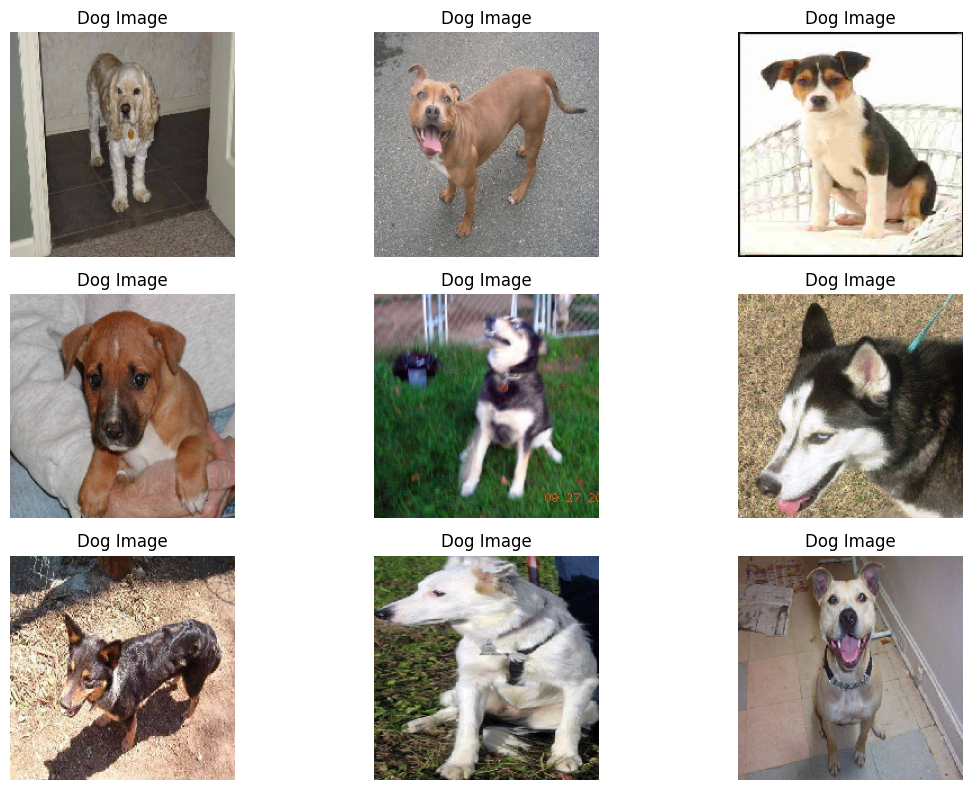

In [4]:

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

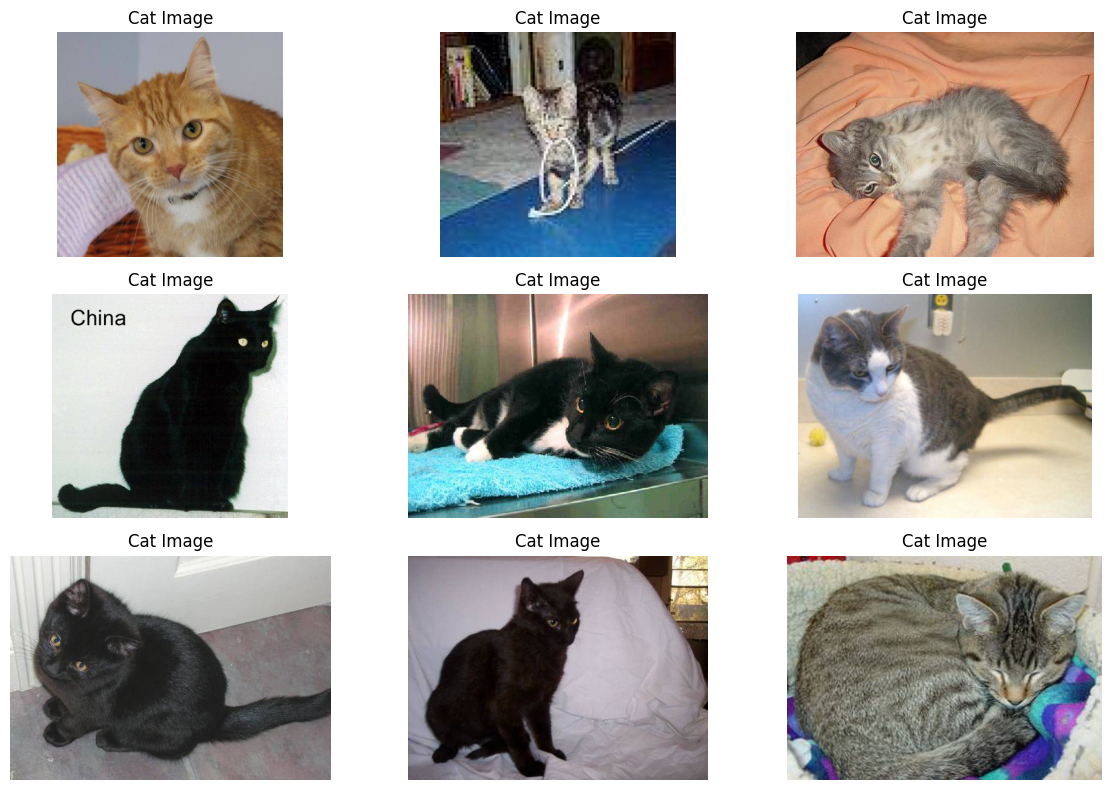

In [5]:

data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [7]:
# tensorflow no carga bien

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img

train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 502 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [10]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [11]:
# Compilar el modelo con Adam 
from tensorflow.keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [12]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 248s 15s/step - accuracy: 0.4623 - loss: 7425.2798


In [19]:
train_data.shape


AttributeError: 'DirectoryIterator' object has no attribute 'shape'

Guardamos el modelo

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 10, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5110 - loss: 0.9483 

ValueError: Must provide at least one structure

Hemos reducido drasticamente el numero de imagenes porque el kernel moría sin remedio. Por eso tenemos un accuracy tan bajo 0.462. 
Haciemos una prediccion y guardamos el modelo

In [14]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/dog/dog9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/dog/dog9.jpg'